In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

In [2]:
Export = pd.read_csv('./data/WITS-Partner-Timeseries Export.csv',encoding='CP949')
Export = Export[Export['Reporter Name'].isin(['Slovenia','Lithuania','Russian Federation','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Iceland','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Luxembourg','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Colombia','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.'])]
Export = Export[Export['Partner Name'].isin(['Slovenia','Lithuania','Russian Federation','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Iceland','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Luxembourg','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Colombia','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.'])]
Export['mean']=Export.mean(axis=1)
Export_net = nx.from_pandas_edgelist(Export, source = 'Reporter Name', target = 'Partner Name', edge_attr = 'mean',create_using = nx.DiGraph())
Export

Export_pivot=pd.pivot_table(Export,index='Reporter Name',columns='Partner Name',values='mean')
Export_pivot=Export_pivot.fillna(0)
Export_csr_mat = csr_matrix(Export_pivot)
Export_csr_mat


<46x46 sparse matrix of type '<class 'numpy.float64'>'
	with 2071 stored elements in Compressed Sparse Row format>

In [3]:
Export=pd.DataFrame([Export['Reporter Name'],Export['Partner Name'],Export['mean']])
Export=Export.transpose()

In [4]:
Export

,Reporter Name,Partner Name,mean
10,Slovenia,Argentina,0.0558792
13,Slovenia,Australia,0.221475
14,Slovenia,Austria,7.65707
21,Slovenia,Belgium,1.13039
32,Slovenia,Brazil,0.154746
...,...,...,...
11378,"Korea, Rep.",Sweden,0.308229
11379,"Korea, Rep.",Switzerland,0.431677
11389,"Korea, Rep.",Turkey,0.746055
11396,"Korea, Rep.",United Kingdom,2.01633


In [5]:
Export.to_csv('./data/cyto_trans.csv')

In [6]:
Export_net.degree

DiDegreeView({'Slovenia': 90, 'Argentina': 90, 'Australia': 90, 'Austria': 90, 'Belgium': 90, 'Brazil': 92, 'Bulgaria': 90, 'Canada': 90, 'Chile': 90, 'China': 90, 'Colombia': 90, 'Czech Republic': 90, 'Denmark': 90, 'Estonia': 90, 'Finland': 90, 'France': 90, 'Germany': 90, 'Greece': 90, 'Hungary': 90, 'Iceland': 90, 'India': 90, 'Indonesia': 90, 'Ireland': 92, 'Israel': 90, 'Italy': 90, 'Japan': 90, 'Korea, Rep.': 90, 'Latvia': 90, 'Lithuania': 90, 'Luxembourg': 90, 'Mexico': 90, 'Netherlands': 90, 'New Zealand': 90, 'Norway': 90, 'Poland': 90, 'Portugal': 90, 'Romania': 90, 'Russian Federation': 90, 'Slovak Republic': 90, 'South Africa': 90, 'Spain': 90, 'Sweden': 90, 'Switzerland': 90, 'Turkey': 90, 'United Kingdom': 90, 'United States': 90})

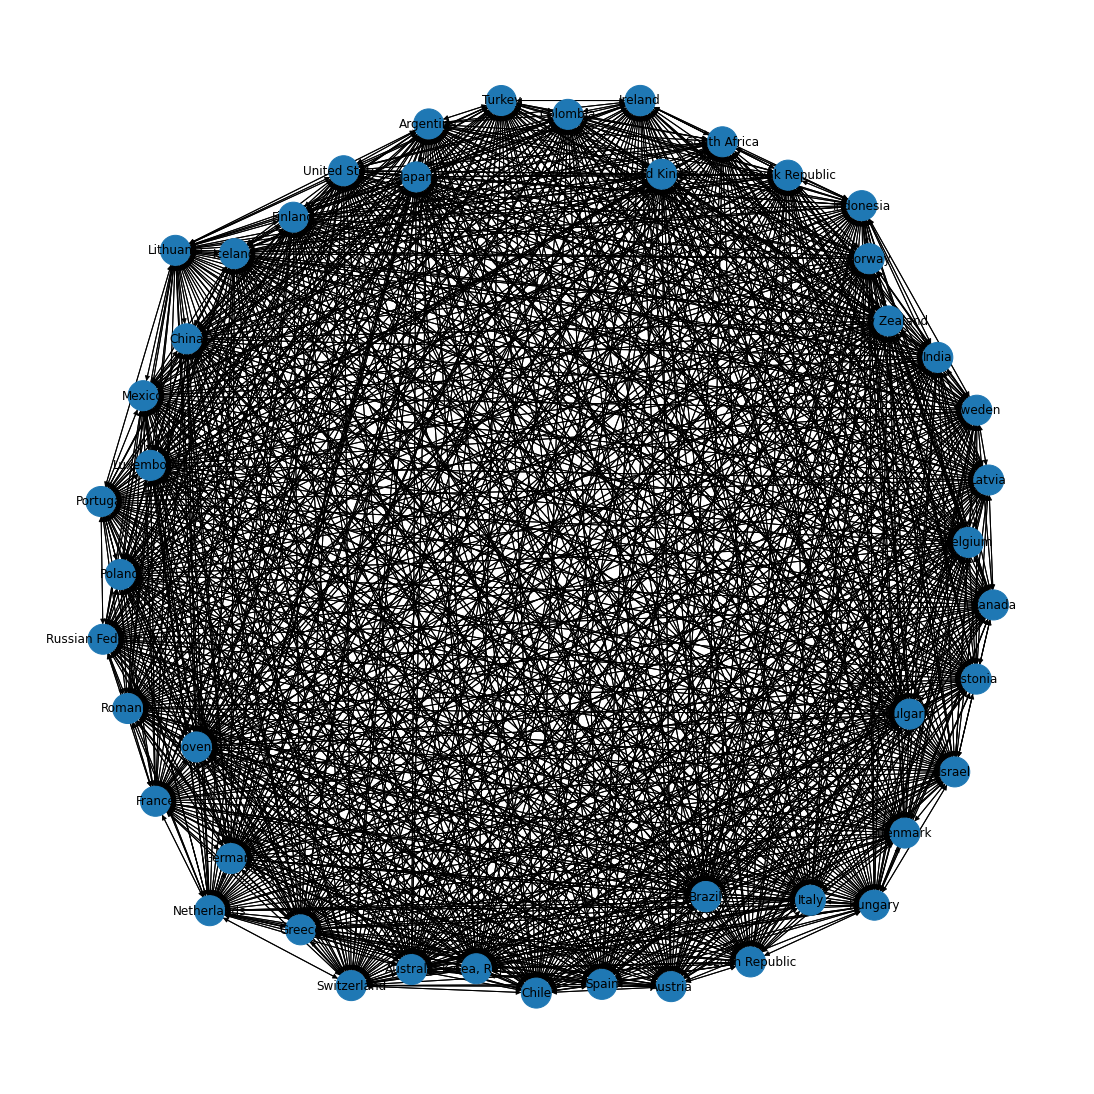

In [7]:
d = dict(Export_net.degree)
plt.figure(figsize=(15,15))
pos = nx.spring_layout(Export_net,10)
nx.draw(Export_net, pos, node_size = [v * 10 for v in d.values()], with_labels = True)
plt.show()

In [8]:

Export_pivot

Partner Name,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Colombia,...,Russian Federation,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Reporter Name,,,,,,,,,,,,,,,,,,,,,
Argentina,0.000000,0.509862,0.022204,0.736785,21.023919,0.084958,1.262442,7.349188,5.737308,1.090062,...,0.921312,0.007656,0.044072,1.191167,3.398777,0.105915,0.814515,0.548796,1.196369,8.428827
Australia,0.093342,0.000000,0.034281,0.596035,0.443177,0.025435,0.851039,0.135394,13.732445,0.021423,...,0.208581,0.003696,0.010204,0.716000,0.410232,0.197703,0.420923,0.287355,3.416390,6.231229
Austria,0.105400,0.558916,0.000000,1.439430,0.480792,0.436920,0.724052,0.085608,1.594112,0.059224,...,1.716348,1.649688,1.881124,0.392280,2.176724,1.128920,5.371824,0.816680,3.523008,5.043844
Belgium,0.123175,0.461175,1.014435,0.000000,0.607665,0.121460,0.612255,0.092815,1.427895,0.071195,...,0.921210,0.226855,0.134635,0.368935,3.199350,1.470855,1.386380,1.097630,8.310530,5.768185
Brazil,8.047203,0.431197,0.139043,2.094330,0.000000,0.094887,1.264547,2.289603,8.451400,1.027283,...,1.489281,0.044300,0.124374,0.703910,1.889200,0.338217,0.663440,0.506310,2.384007,17.528947
Bulgaria,0.065913,0.094870,1.761400,4.798070,0.188257,0.000000,0.407600,0.033017,1.188870,0.023657,...,2.957261,0.513643,0.622722,0.172100,2.705883,0.550243,0.768143,8.975217,2.376065,2.581139
Canada,0.060437,0.403273,0.085233,0.565375,0.400500,0.016260,0.000000,0.131980,2.145653,0.138123,...,0.187974,0.008016,0.012025,0.104993,0.244333,0.114667,0.303167,0.138943,2.406403,79.434097
Chile,2.513586,0.520400,0.064517,1.380065,5.149683,0.380662,1.490200,0.000000,12.531114,1.103641,...,0.480819,0.001540,0.004392,0.294262,2.271800,0.499821,0.564441,0.377983,3.450679,14.751445
China,0.272756,1.475030,0.117244,0.877090,0.868367,0.047544,1.300678,0.399000,0.000000,0.163893,...,1.675359,0.070054,0.055188,0.523044,0.924678,0.323563,0.235063,0.542011,2.348019,18.673348


In [9]:
import os
import sys
import scipy as sp
import scipy.sparse as sparse
from numpy.testing import assert_allclose
import unittest
from fast_pagerank import pagerank
from fast_pagerank import pagerank_power
pr=pagerank(Export_csr_mat,p=0.85)
pr

array([0.00714372, 0.01383237, 0.01644391, 0.03411821, 0.01376154,
       0.00538223, 0.0414536 , 0.00685865, 0.04023774, 0.00579083,
       0.01180969, 0.01182186, 0.00500037, 0.01031183, 0.05761445,
       0.09986984, 0.0086555 , 0.00948624, 0.0037163 , 0.01251773,
       0.00816549, 0.01108885, 0.0082949 , 0.04267851, 0.04204125,
       0.02170388, 0.00520399, 0.0055146 , 0.00527112, 0.02698699,
       0.04310327, 0.00542404, 0.01034962, 0.01530282, 0.01028998,
       0.00758521, 0.01785187, 0.00741266, 0.00542386, 0.00782519,
       0.02961954, 0.01704602, 0.02198998, 0.01365145, 0.05711881,
       0.13722949])

In [10]:
c_list=(['Slovenia','Lithuania','Russian Federation','Romania','Argentina','Estonia','Latvia','Slovak Republic','Finland','Hungary','Mexico','Czech Republic','Bulgaria','Iceland','Turkey','Germany','Austria','Brazil','Netherlands','Chile','Switzerland','Denmark','United Kingdom','Italy','South Africa','Luxembourg','Sweden','Japan','Spain','Belgium','United States','Canada','Portugal','Israel','France','Poland','Colombia','Norway','China','New Zealand','Greece','India','Indonesia','Ireland','Australia','Korea, Rep.'])
c_list.sort()
print(c_list)

['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


In [11]:
import pandas as pd
from pandas import DataFrame

pagerank_arr=np.array(pr)

In [12]:
pagerank_arr

array([0.00714372, 0.01383237, 0.01644391, 0.03411821, 0.01376154,
       0.00538223, 0.0414536 , 0.00685865, 0.04023774, 0.00579083,
       0.01180969, 0.01182186, 0.00500037, 0.01031183, 0.05761445,
       0.09986984, 0.0086555 , 0.00948624, 0.0037163 , 0.01251773,
       0.00816549, 0.01108885, 0.0082949 , 0.04267851, 0.04204125,
       0.02170388, 0.00520399, 0.0055146 , 0.00527112, 0.02698699,
       0.04310327, 0.00542404, 0.01034962, 0.01530282, 0.01028998,
       0.00758521, 0.01785187, 0.00741266, 0.00542386, 0.00782519,
       0.02961954, 0.01704602, 0.02198998, 0.01365145, 0.05711881,
       0.13722949])

,Value
Argentina,0.004957
Australia,0.012601
Austria,0.015315
Belgium,0.036102
Brazil,0.012480
Bulgaria,0.002663
Canada,0.049605
Chile,0.004575
China,0.043383
Colombia,0.003572


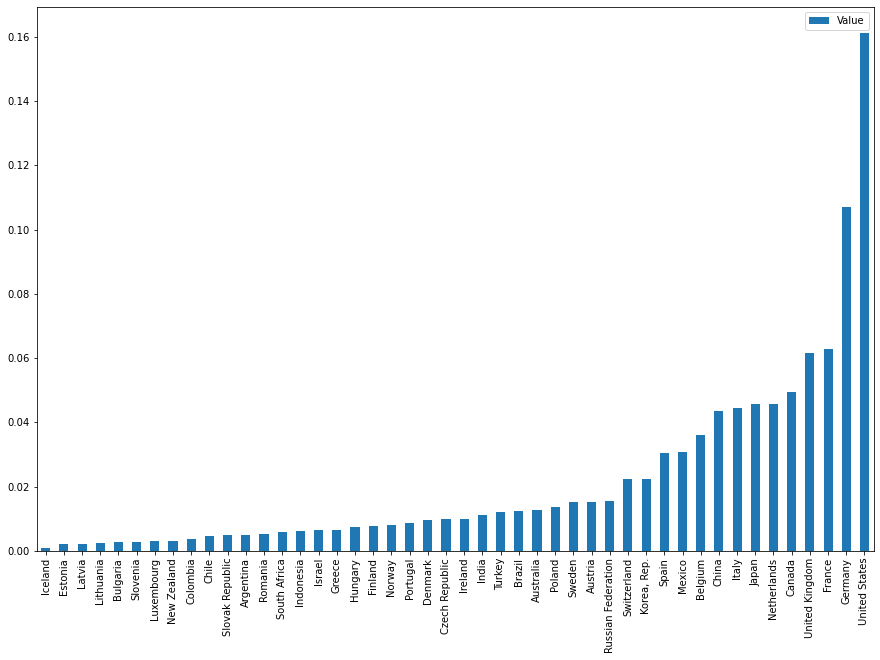

In [13]:
pr=pagerank_power(Export_csr_mat, p=0.85, personalize=pagerank_arr, tol=1e-6)

pagerank = DataFrame(data=pr,index=c_list,columns=['Value'])
pagerank.sort_values(by='Value').plot(kind='bar',figsize=(15,10))
pagerank.to_csv("./data/pagerank.csv")
pagerank

In [14]:
pagerank_pivot=Export_pivot.copy()

for i in (c_list):
    arr2 = np.array(Export_pivot[i])

    pr2=pagerank_power(Export_csr_mat, p=0.85, personalize=arr2, tol=1e-6)

    df2 = DataFrame(data=pr2,index=c_list,columns=['Value'])
    pagerank_pivot.loc[i]=df2['Value']


In [15]:
pagerank_pivot

Partner Name,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Colombia,...,Russian Federation,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Reporter Name,,,,,,,,,,,,,,,,,,,,,
Argentina,0.010436,0.011223,0.011704,0.030178,0.081616,0.002302,0.043517,0.027338,0.047046,0.007944,...,0.012999,0.003656,0.002330,0.007060,0.030011,0.012700,0.019255,0.009889,0.050573,0.155774
Australia,0.005349,0.025228,0.012331,0.029663,0.011675,0.001891,0.043748,0.005273,0.051599,0.002913,...,0.012056,0.003568,0.002436,0.009407,0.024502,0.014741,0.019476,0.009850,0.055409,0.152212
Austria,0.003265,0.008880,0.018952,0.034422,0.009067,0.006940,0.032578,0.002954,0.031708,0.002264,...,0.016941,0.022938,0.021773,0.004969,0.029889,0.016454,0.027961,0.013720,0.055490,0.113992
Belgium,0.004495,0.010497,0.015351,0.035443,0.012041,0.007602,0.036805,0.004804,0.035035,0.004006,...,0.015396,0.006186,0.003543,0.007852,0.031318,0.018865,0.022002,0.012854,0.062422,0.128724
Brazil,0.068476,0.011727,0.012170,0.030233,0.026194,0.002300,0.043192,0.024633,0.045682,0.008838,...,0.013369,0.003379,0.002280,0.007500,0.028811,0.013196,0.019764,0.010105,0.050642,0.150952
Bulgaria,0.004265,0.009172,0.020102,0.031904,0.010124,0.005180,0.033121,0.006789,0.032943,0.002301,...,0.022842,0.009265,0.008640,0.004691,0.029900,0.014102,0.021129,0.025074,0.055322,0.116037
Canada,0.007627,0.013949,0.012862,0.030698,0.015121,0.002701,0.052486,0.008006,0.043336,0.006093,...,0.012683,0.003794,0.002484,0.006324,0.025294,0.014496,0.020281,0.010550,0.055724,0.202014
Chile,0.068368,0.011745,0.010988,0.028783,0.044806,0.001883,0.044548,0.009929,0.046353,0.019776,...,0.012348,0.003176,0.002016,0.006484,0.029211,0.012485,0.017950,0.009694,0.049094,0.157310
China,0.010586,0.026718,0.012656,0.029950,0.020724,0.002944,0.044154,0.016847,0.047535,0.005457,...,0.018884,0.004320,0.002243,0.009953,0.024974,0.013968,0.020110,0.010687,0.052548,0.151498


In [82]:
def mean_norm(df_input):
    return df_input.apply(lambda x: ((x)*50/x.sum()))

In [83]:
pagerank_pivot_norm = mean_norm(pagerank_pivot.transpose()).transpose()
Export_pivot_norm = mean_norm(Export_pivot.transpose()).transpose()
pagerank_pivot_norm

Partner Name,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Colombia,...,Russian Federation,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Reporter Name,,,,,,,,,,,,,,,,,,,,,
Argentina,0.521792,0.561139,0.585180,1.508919,4.080824,0.115085,2.175857,1.366924,2.352307,0.397189,...,0.649971,0.182798,0.116505,0.352984,1.500562,0.634984,0.962759,0.494471,2.528644,7.788676
Australia,0.267464,1.261423,0.616526,1.483133,0.583768,0.094533,2.187401,0.263650,2.579958,0.145663,...,0.602803,0.178399,0.121790,0.470371,1.225106,0.737035,0.973799,0.492478,2.770439,7.610594
Austria,0.163266,0.443978,0.947599,1.721101,0.453329,0.346976,1.628915,0.147703,1.585401,0.113192,...,0.847053,1.146878,1.088629,0.248438,1.494438,0.822700,1.398040,0.686023,2.774515,5.699613
Belgium,0.224741,0.524839,0.767526,1.772146,0.602062,0.380108,1.840232,0.240222,1.751749,0.200293,...,0.769782,0.309320,0.177137,0.392624,1.565921,0.943249,1.100097,0.642690,3.121123,6.436182
Brazil,3.423799,0.586356,0.608483,1.511626,1.309684,0.115001,2.159579,1.231626,2.284083,0.441877,...,0.668459,0.168964,0.114008,0.374978,1.440546,0.659804,0.988184,0.505239,2.532117,7.547590
Bulgaria,0.213269,0.458613,1.005112,1.595197,0.506191,0.259024,1.656056,0.339454,1.647169,0.115065,...,1.142081,0.463244,0.431995,0.234558,1.495009,0.705086,1.056433,1.253700,2.766106,5.801827
Canada,0.381354,0.697450,0.643107,1.534919,0.756068,0.135065,2.624276,0.400288,2.166782,0.304641,...,0.634158,0.189686,0.124185,0.316186,1.264700,0.724821,1.014069,0.527493,2.786191,10.100706
Chile,3.418400,0.587226,0.549391,1.439144,2.240294,0.094172,2.227389,0.496441,2.317632,0.988800,...,0.617405,0.158799,0.100776,0.324197,1.460546,0.624259,0.897477,0.484684,2.454705,7.865506
China,0.529310,1.335913,0.632819,1.497476,1.036205,0.147178,2.207724,0.842336,2.376736,0.272841,...,0.944186,0.216013,0.112129,0.497639,1.248702,0.698418,1.005517,0.534345,2.627389,7.574913


[[0.52179237 0.5611391  0.58517967 ... 0.49447075 2.52864397 7.78867595]
 [0.26746363 1.261423   0.61652592 ... 0.49247841 2.77043861 7.61059366]
 [0.16326599 0.44397758 0.94759929 ... 0.68602301 2.77451458 5.69961311]
 ...
 [0.25156607 0.50686638 0.83748484 ... 0.71125601 2.83157281 6.17167413]
 [0.21050079 0.60362485 0.7631198  ... 0.69563406 2.94803125 6.42668883]
 [0.33145663 0.64738781 0.60182146 ... 0.53979004 2.68819958 8.70142671]]


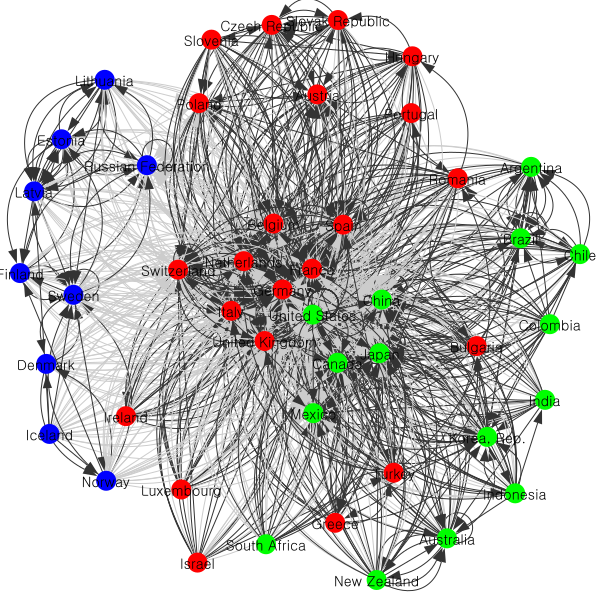

In [84]:
import igraph as ig
import leidenalg as la

A = pagerank_pivot_norm.values
print(A)
G = ig.Graph.Adjacency(A.tolist())
G.es['weight'] = A[A.nonzero()]
G.vs['label'] = pagerank_pivot_norm.index
# compute the best partition
partition = la.find_partition(G, la.ModularityVertexPartition)
#partition = la.find_partition(G, la.CPMVertexPartition,resolution_parameter = .5)
cluster_id = df2
cluster_id['Value']=partition.membership
ig.plot(partition, vertex_color=partition.membership,
            vertex_frame_width=0,
            palette=ig.ClusterColoringPalette(len(set(partition.membership)) + 3))

In [20]:
cluster_id['Value'] = cluster_id['Value'].map({0:'West EU',
                             1:'Asia & America',
                             2:'East EU'})

In [21]:
cluster_id

,Value
Argentina,Asia & America
Australia,NaN
Austria,NaN
Belgium,West EU
Brazil,Asia & America
Bulgaria,East EU
Canada,West EU
Chile,Asia & America
China,West EU
Colombia,West EU


In [22]:
cluster_id.to_csv('./data/cluster_id.csv')